# Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

## Dados e Configuração

** Importar numpy e pandas **

In [1]:
import numpy as np
import pandas as pd

** Importe as bibliotecas de visualização e configure% matplotlib inline. **

In [162]:
import matplotlib as plt
%matplotlib inline

** Leia o arquivo csv como um dataframe chamado df **

In [3]:
df911= pd.read_csv('911.csv')

** Verifique a info() do df **

In [4]:
df911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Verifique o cabeçalho do df **

In [6]:
df911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


## Perguntas básicas

** Quais são os top 5 CEPs nas chamadas 911? **

In [28]:
df911['zip'].value_counts().iloc[:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Quais são os 5 principais municípios nas chamadas 911? **

In [34]:
df911['twp'].value_counts().iloc[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem? **

In [38]:
df911['title'].nunique()

110

110

## Criando novos recursos

** Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string. **

** Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS. **

In [45]:
def SeparaColuna(x):
    print(x.split(':')[0])
    return x.split(':')[0]

In [46]:
df911['Reason'] = df911['title'].apply(lambda x:SeparaColuna(x))

EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Fire
EMS
Traffic
EMS
Traffic
EMS
Fire
Traffic
Traffic
EMS
Fire
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
Fire
EMS
EMS
Traffic
Fire
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
Fire
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Fire
Fire
Fire
Traffic
Traffic
Traffic
Fire
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
Traffic
Fire
Traffic
Traffic
EMS
Traffic
EMS
Fire
EMS
Traffic
EMS
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
EMS
Fire
T

EMS
Fire
Traffic
EMS
Traffic
Fire
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
EMS
Fire
Traffic
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Fire
Traffic
EMS
EMS
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
Traffic
Fire
Traffic
Fire
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Fire
Fire
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
Fire
Traffic
Traffic
Fire
EMS
EMS
EMS
Traffic
Traffic
EMS
Fire
EMS
EMS
Fire
EMS
Traffic
EMS
EMS
EMS
Fire
Traffic
EMS
Fire
Traffic
Traffic
EMS
EMS
Fire
Traffic
Fire
EMS
Traffic
EMS
Fire
EMS
Traffic
Fire
Fire
Traffic
Traffic
Traffic
EMS
EMS
EMS
Fire
EMS
Fire
EMS

EMS
Fire
Traffic
Traffic
Traffic
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
Fire
Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
Fire
EMS
Fire
Fire
EMS
Traffic
EMS
Traffic
Fire
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
Fire
Fire
Traffic
Traffic
EMS
EMS
Traffic
Traffic
Traffic
Fire
EMS
EMS
Fire
Traffic
Traffic
EMS
Traffic
EMS
EMS
Traffic
Fire
Traffic
Traffic
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
Fire
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
Fire
Traffic
Fire
Traffic
Traffic
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
EMS
Traffic
Fire
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Fire
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic

EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Fire
EMS
EMS
EMS
Traffic
Traffic
Fire
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
Traffic
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Fire
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
Traffic
EMS
Traffic
EMS
Traffic
Fire
Fire
EMS
Fire
Fire
EMS
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
Fire
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
Fire
Fire
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
Fir

EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Fire
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
Fire
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
EMS
Fire
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
Fire
EMS
Fire
EMS
EMS
EMS
EMS
Fire
EMS
Traffic
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
Fire
EMS
Traffic
EMS
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
EMS
Fire
EMS
EMS
Traffic
EMS
Traffic
Fire
Traffic
EMS
Fire
Traffic
Traffic
EMS
Fire
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
Fire
Traffic
EMS
EMS
Traffic
Traffic
EMS
Fire
Traffic
EMS
Fire
EMS
Fire
Fire
Fire
EMS
EMS
Fire
EMS
EMS
EMS
Fire
EMS
Fire
EMS
EMS
Traffic
Traffic
Fire
EMS
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
Fire
EMS
Traffic
Traffic
Fire
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
Fire
Traffic
EMS
EMS
Fire
Traffic

EMS
EMS
Fire
EMS
EMS
Traffic
Fire
Fire
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
Fire
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
Traffic
Traffic
EMS
Fire
EMS
EMS
Fire
Traffic
Traffic
EMS
EMS
EMS
Fire
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
Fire
Traffic
Fire
EMS
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
Traffic
Fire
Fire
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Fire
EMS
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
Fire
Fire
Fire
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
Traf

Traffic
Traffic
Traffic
EMS
Fire
Traffic
EMS
Traffic
EMS
EMS
Fire
Fire
Fire
EMS
EMS
Fire
EMS
Traffic
EMS
Fire
EMS
Fire
Fire
Fire
EMS
EMS
Traffic
Fire
Traffic
EMS
Fire
EMS
Traffic
EMS
Fire
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Fire
EMS
Fire
EMS
Traffic
Traffic
Fire
Fire
EMS
Traffic
Fire
EMS
Fire
Fire
Fire
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Fire
Fire
Fire
Traffic
Fire
Fire
EMS
Traffic
EMS
Traffic
Traffic
Fire
EMS
EMS
Fire
Traffic
Traffic
Fire
Fire
EMS
EMS
Fire
EMS
Traffic
Traffic
EMS
EMS
Fire
Fire
Traffic
Fire
EMS
Fire
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
EMS
Fire
Fire
Fire
EMS
EMS
Traffic
Fire
Traffic
EMS
EMS
Fire
Traffic
Fire
Fire
Fire
EMS
EMS
Traffic
EMS
Traffic
Fire
EMS
EMS
Traffic
Traffic
Traffic
EMS
Fire
Fire
Traffic
EMS
EMS
Fire
Fire
EMS
EMS
Traffic
Traffic
Traffic
Fire
EMS
Fire
EMS
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
Traffic
Fire
Traffic
Traffic
Traffic

Traffic
EMS
Fire
Traffic
EMS
EMS
Traffic
Traffic
EMS
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
EMS
Traffic
Fire
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
Fire
EMS
Traffic
EMS
Traffic
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
Traffic
Fire
Fire
Traffic
Traffic
Traffic
EMS
Fire
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Fire
Traffic
EMS
Fire
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
Fire
Traffic
Traffic
EMS
EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
Fire
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
Fire
EMS
Fire
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Fire
Fire
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic

Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
EMS
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Fire
Fire
Traffic
Traffic
Fire
Fire
Fire
Traffic
EMS
Fire
Fire
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Fire
EMS
EMS
Traffic
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
EMS
EMS
Fire
Traffic
EMS
EMS
EMS
Traffic
Traffic
Fire
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Fire
EMS
EMS
Traffic
Fire
Traffic
EMS
Traffic
Traffic
Traffic
EMS
Fire
EMS
Fire
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
Fire
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Fire
EMS
Traffic
Traffic
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
Fire
Fire
Fire
EMS
EMS
EMS

Traffic
EMS
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
Fire
Traffic
Traffic
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
Traffic
Traffic
EMS
Fire
EMS
EMS
EMS
Fire
Traffic
Fire
Traffic
Fire
Traffic
EMS
Fire
EMS
Traffic
Fire
Traffic
Fire
Fire
EMS
EMS
EMS
Fire
Fire
EMS
Traffic
Traffic
Traffic
Fire
EMS
EMS
EMS
Fire
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
Fire
EMS
EMS
EMS
Fire
Fire
EMS
EMS
Fire
EMS
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Fire
EMS
Fire
Traffic
Traffic
Traffic
EMS
Traffic
Fire
EMS
Traffic
Traffic
EMS
Traffic
EMS
Fire
Traffic
Traffic
EMS
Traffic
Traffic
EMS
EMS
Fire
EMS
Fire
EMS
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
Fire
EMS
EMS
Fire
Fire
EMS
EMS
EMS
Traffic
Fire
Traffic
Traffic
Traffic
EMS
Traffic
Fire
EMS
Traffic
EMS
EMS
EMS
Traffic
Fire
Fire
EMS
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
Traffic
Traff

EMS
EMS
EMS
EMS
Fire
EMS
Traffic
Fire
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
Traffic
Fire
EMS
Traffic
EMS
Fire
Fire
Fire
Traffic
Traffic
Traffic
Fire
Traffic
EMS
EMS
EMS
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
Fire
Fire
EMS
EMS
Traffic
Traffic
EMS
Fire
Fire
Traffic
Traffic
EMS
Traffic
Traffic
Fire
Fire
EMS
Fire
EMS
EMS
Traffic
Traffic
Traffic
EMS
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
Traffic
EMS
EMS
EMS
Traffic
Traffic
Fire
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Fire
EMS
EMS
EMS
Fire
Fire
Traffic
EMS
EMS
Fire
Fire
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Fire
Traffic
EMS
Traffic
EMS
EMS
Fire
EMS
Traffic
Fire
EMS
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS

EMS
EMS
EMS
Fire
Traffic
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
Fire
Traffic
Traffic
Fire
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
Fire
Traffic
Fire
EMS
Traffic
Fire
Traffic
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
EMS
Fire
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
EMS
Traffic
EMS
Traffic
Traffic
Fire
Fire
EMS
Traffic
Fire
EMS
Traffi

Fire
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
Fire
Traffic
EMS
Fire
Fire
Traffic
Fire
Fire
EMS
Fire
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
Fire
Traffic
EMS
EMS
Traffic
EMS
Traffic
EMS
Traffic
Traffic
Fire
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
Fire
Traffic
EMS
Fire
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
EMS
Fire
EMS
EMS
EMS
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
Fire
Fire
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Fire
Traffic
EMS
Traffic
EMS
EMS
Fire
Traffic
Fire
EMS
EMS
EMS
Fire
EMS
Traffic
Fire
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
Fire
Traffic
Fire
Fire
EMS
Traffic
EMS
Fire
EM

EMS
Fire
EMS
EMS
Fire
EMS
EMS
EMS
Traffic
EMS
EMS
Fire
Traffic
EMS
Fire
EMS
Fire
Traffic
EMS
Fire
Traffic
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Fire
EMS
Fire
Traffic
Traffic
EMS
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Fire
Traffic
Traffic
EMS
Traffic
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
Traffic
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
Fire
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
Fire
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
Traffic
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
Fire
EMS
EMS
Fire
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Fire
Traffic
EMS
Fire
Traffic
EMS
EMS
Fire
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
Fire
EMS
Traffic
EMS
Fire
Fire
EMS
Traffic
EMS
EMS
Traffic
Traff

Fire
Traffic
Traffic
EMS
Traffic
Fire
Traffic
Fire
EMS
Fire
Traffic
Traffic
Fire
Traffic
Fire
Fire
Fire
EMS
Traffic
EMS
Fire
Traffic
Fire
Fire
Traffic
Traffic
Fire
EMS
EMS
Fire
Fire
Traffic
Traffic
Traffic
EMS
Fire
Fire
Traffic
Fire
Fire
Fire
EMS
Traffic
Fire
EMS
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
Traffic
Fire
Fire
Traffic
Fire
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
Traffic
Fire
EMS
Traffic
Fire
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Fire
Fire
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
Fire
Fire
Traffic
Traffic
Fire
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
EMS
EMS
EMS
Fire
Fire
Traffic
Traffic
Traffic
EMS
Traffic
Traf

EMS
Traffic
EMS
EMS
Fire
EMS
Traffic
Traffic
EMS
EMS
Fire
Fire
EMS
EMS
Traffic
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
Fire
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
Traffic
EMS
Fire
EMS
Traffic
Fire
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Fire
EMS
Fire
EMS
Fire
Traffic
Fire
Traffic
Traffic
EMS
Traffic


EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
Fire
Traffic
Fire
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Fire
Traffic
Traffic
EMS
Traffic
EMS
Fire
Traffic
Fire
EMS
EMS
Fire
Fire
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
Fire
Fire
EMS
Traffic
EMS
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Fire
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Fire
EMS
Fire
EMS
Fire
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
Traffic
Fire
Traffic
Fire
EMS
Fire
Fire
EMS
EMS
EMS
EMS
Fire
EMS
Fire
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
EMS
EMS
EMS
Fire
Traffic
Fire
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
EMS
EMS
Fire
Fire
EMS
EMS
Fire
Fire
Traffic
Fire
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
Fire
EMS
Traffic
Fire
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
Fire
Fire
EM

Traffic
EMS
Traffic
Traffic
EMS
Fire
Traffic
EMS
EMS
Fire
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
Fire
EMS
Traffic
Traffic
EMS
Fire
Fire
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
EMS
Traffic
Fire
EMS
EMS
Traffic
EMS
EMS
Fire
Traffic
Traffic
Fire
Fire
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
Fire
Traffic
EMS
Traffic
EMS
Fire
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
Fire
Fire
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
Fire
EMS
EMS
Fire
Traffic
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
Traffic
EMS
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
Traffic
Fire
Fire
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic

EMS
Fire
Traffic
Traffic
Fire
Fire
Traffic
Traffic
EMS
Fire
EMS
Fire
EMS
EMS
Fire
EMS
EMS
EMS
Fire
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
Fire
Fire
EMS
Fire
Traffic
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
Fire
Fire
Traffic
Traffic
Traffic
Fire
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
Fire
EMS
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
EMS
Fire
Traffic
EMS
Traffic
EMS
Traffic
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffi

Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
Fire
Traffic
Traffic
Fire
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
EMS
EMS
Traffic
Fire
Traffic
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Fire
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
EMS
Fire
EMS
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
Fire
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Fire
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
EMS
Traffic
Traffic
Fire
Traffic
EMS
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
Fire
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
Fire
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
Fire


Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Fire
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Fire
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
Fire
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
EMS
Fire
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
Fire
Traffic
EMS
Traffic
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Fire
EMS
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
EMS
Traffic
Fire
Traffic
Traffic
EMS
Fire
Traffic
EMS
Traffic
Fire
EMS
EMS
Fire
EMS
Traffic
EMS
Fire
Traffic
Fire
Traffic
EMS
Fire
Fire
Fire
Fire
Fire
EMS
Traffic
Fire
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
Traffic
Fire
F

Traffic
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
Fire
EMS
EMS
Traffic
Fire
Traffic
Fire
Fire
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
Fire
Fire
Fire
Fire
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
Fire
Fire
Traffic
Fire
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
Traffic
Traffic
Fire
Traffic
EMS
Fire
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Traffic
Fire
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
EMS
Fire
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Fire
Traffic
Traffic
EMS
Traffic
Fire
Fire
Fire
Traffic
EMS
Traffic
Traffic
Fire
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Fire
EMS
EMS
Traffic
Traffic
EMS
Fire
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Fire
EMS
Fire
Traffic
Traffic
EMS
Fir

EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
Fire
Traffic
Traffic
Fire
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Fire
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
Fire
Fire
Fire
Traffic
EMS
Fire
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Fire
Fire
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
Fire
Traffic
Traffic
Traffic
Traffic
Fire
EMS
EMS
Fire
Traffic
Traffic
EMS
Fire
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Fire
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
Fire
Fire
EMS
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
Fire
EMS
Fire
Traffic
EMS
Traffic
Traffic
EMS
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Traffic


Traffic
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
Traffic
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
Fire
Traffic
Traffic
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
Fire
EMS
Traffic
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
Fire
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
Fire
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
EMS
EMS
Fire
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
Traffic
Traffic
EMS
Traffic
EMS
Fire
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Fire
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Fire
Traffic
EMS
Traffic
Traffic
Traffic
Fire
EMS
Traffic
EMS
EMS
Traffic
EMS
Fire
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Fire
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
Fire
EMS
Traffic
EMS
Traf

EMS
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
Fire
EMS
Fire
EMS
EMS
Fire
Fire
EMS
Fire
EMS
Traffic
Fire
Fire
EMS
Traffic
Traffic
EMS
Fire
EMS
Traffic
Fire
EMS
Traffic
Traffic
EMS
EMS
Fire
Fire
EMS
EMS
Traffic
EMS
Traffic
EMS
Traffic
Traffic
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
Traffic
Traffic
EMS
Fire
Traffic
EMS
Fire
Traffic
EMS
Fire
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
EMS
EMS
Fire
EMS
Fire
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
Fire
EMS
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Traffic
EMS
Traffic
Fire
Fire
EMS
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
Traffic
Traffic
EMS
Traffic
EMS
EMS
Traffic
Fire
EMS
Traffic
EMS
EMS

EMS
Fire
Traffic
EMS
EMS
Fire
Traffic
Traffic
Traffic
EMS
Traffic
EMS
Fire
Fire
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
Fire
EMS
EMS
Traffic
Fire
Traffic
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
Traffic
EMS
EMS
EMS
Fire
Traffic
Traffic
EMS
Fire
Fire
Traffic
Traffic
EMS
Fire
Fire
Traffic
Traffic
EMS
Fire
EMS
Traffic
Traffic
Traffic
EMS
Fire
Traffic
Traffic
Traffic
Fire
EMS
Fire
Fire
Traffic
Fire
Fire
Traffic
Traffic
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
Fire
Traffic
EMS
Fire
Fire
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
EMS
EMS
Fire
EMS
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
EMS
Fire
Traffic
Traffic
Traffic
Traffic
Fire
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
Fire
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
EMS
EMS
EMS
Fire
Traffic


EMS
Traffic
Fire
Fire
EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
Fire
Fire
EMS
Fire
Fire
Traffic
Traffic
Traffic
EMS
EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Fire
EMS
EMS
Fire
Traffic
Fire
Fire
Traffic
Traffic
Fire
EMS
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
Fire
Fire
EMS
Fire
EMS
Traffic
Fire
Traffic
Traffic
EMS
EMS
Fire
Fire
Traffic
EMS
Fire
EMS
Fire
EMS
Fire
Fire
EMS
EMS
Fire
EMS
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
Traffic
EMS
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
Fire
Traffic
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
EMS
Traffic
Traffic
Fire
Fire
EMS
EMS
Fire
Fire
EMS
EMS
Traffic
Fire
Traffic
EMS
Traffic
Traffic
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
Fire
Traffic
Traffic
Fire
Fire
EMS
Traffic
EMS
Traffic
Fire
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
EMS


Fire
Traffic
Fire
EMS
EMS
Traffic
EMS
EMS
Fire
Traffic
Fire
Traffic
Fire
Traffic
EMS
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Fire
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
Fire
EMS
Traffic
EMS
Traffic
EMS
EMS
Fire
Fire
Traffic
Traffic
Fire
Traffic
Traffic
Fire
Fire
Fire
Traffic
EMS
EMS
EMS
Fire
EMS
Fire
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
Traffic
EMS
Fire
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
Fire
Traffic
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
Fire
Traffic
Traffic
EMS
Fire
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
Traffic
Fire
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Fire
Traffic
EMS
Traffic
EMS
Fire
EMS
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
Traffic
Traffic
Traffic
EMS
EMS
Fire
Traffic
Traffic
EMS
Traffic
EMS
EMS
EMS
Traffic

EMS
EMS
EMS
Traffic
EMS
EMS
Fire
Traffic
EMS
Traffic
Traffic
Traffic
EMS
Traffic
EMS
EMS
EMS
Fire
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
Fire
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
EMS
Traffic
Fire
Traffic
EMS
EMS
EMS
Traffic
Fire
Traffic
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
Fire
Traffic
EMS
Traffic
Fire
EMS
Fire
Traffic
Traffic
Fire
EMS
EMS
Traffic
Fire
Fire
Traffic
EMS
Traffic
Traffic
Fire
Traffic
Fire
Fire
EMS
EMS
Traffic
Fire
Fire
Fire
EMS
Traffic
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
EMS
Fire
EMS
EMS
EMS
Traffic
EMS
EMS
EMS
Fire
Fire
EMS
Traffic
Traffic
Traffic
Traffic
Fire
EMS
Fire
Fire
EMS
EMS
Fire
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
Fire
EMS
EMS
Traffic
Fire
Fire
Traffic
Fire
Fire
EMS
Traffic
EMS
Fire
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
EMS
Fire
Fire
EMS
Traffic
Fire
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
Traffic
EMS

EMS
EMS
Traffic
EMS
Traffic
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Fire
Traffic
Traffic
Fire
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
Traffic
EMS
Fire
EMS
EMS
EMS
EMS
Fire
Fire
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
EMS
Traffic
EMS
Traffic
Traffic
EMS
Traffic
Traffic
EMS
EMS
Fire
EMS
EMS
Traffic
EMS
Fire
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Fire
EMS
EMS
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
Fire
Traffic
Fire
Fire
Traffic
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
Traffic
EMS
EMS
Traffic
Traffic
EMS
Fire
Traffic
Fire
EMS
EMS
Traffic
EMS
EMS
Traffic
EMS
Traffic
EMS
Fire
EMS
Traffic
Traffic
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
EMS
Fire
EMS
Traffic
EMS
Fire
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
Traffic
Fire
EMS
Traffic
Traffic
EMS
Fire
Fire
EMS
Traffic
Traffic
EMS
EMS
EMS
Fire
EM

Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
Traffic
Fire
EMS
Traffic
EMS
EMS
EMS
EMS
Traffic
EMS
Traffic
EMS
Traffic
Fire
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
EMS
Fire
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
Traffic
Fire
EMS
Traffic
Traffic
Traffic
Traffic
EMS
EMS
EMS
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Fire
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
Fire
Fire
Traffic
Traffic
EMS
EMS
Fire
EMS
EMS
Traffic
Fire
EMS
EMS
Traffic
Traffic
Traffic
EMS
Traffic
Traffic
Traffic
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
EMS
Fire
Traffic
Fire
EMS
Traffic
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
Traffic
EMS
EMS
Traffic
EMS
Fire
EMS
Traffic
Traffic
EMS
EMS
Traffic
Traffic
EMS
EMS
EMS
Traffic
EMS
Traffic
Fire
Traffic
EMS
Fire
Traffic
Traffic
EMS
Traffic
EMS
Traffic
Fire
EMS
Fire
EMS
EMS
EMS
Traffic
EMS
Fire
EMS
EMS
Traffic
EMS
Fire
EMS
Fire
EMS
Traffic
Traffic
EMS
Fire
Traffic
Traffic
Fi

In [48]:
df911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna? **

** Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna. **

In [65]:
df911['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [66]:
import seaborn as sns

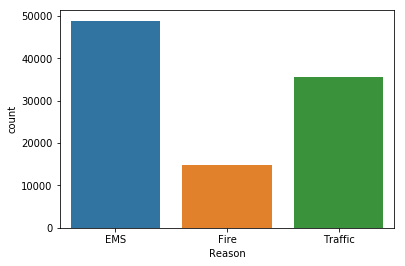

In [68]:
sns.countplot(x='Reason', data=df911)

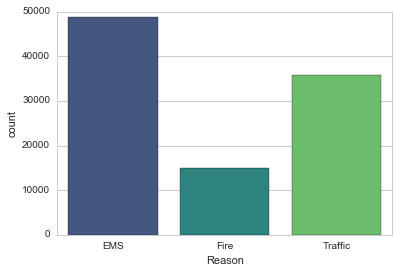

** Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp? **

In [75]:
type(df911['timeStamp'][0])

str

str

** Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime. **

In [97]:
df911['timeStamp'] = pd.to_datetime(df911['timeStamp'])

In [98]:
time = df911['timeStamp'].iloc[0]

In [99]:
type(time)

pandas._libs.tslibs.timestamps.Timestamp

** Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

** Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa. **

In [258]:
time = df911['timeStamp'][0]

In [259]:
time.day

10

In [260]:
df911['Hour'] = df911['timeStamp'].apply(lambda x:x.hour)
df911['Month'] = df911['timeStamp'].apply(lambda x:x.month)
df911['DayOfWeek'] = df911['timeStamp'].apply(lambda x:x.dayofweek)

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
99462    2
99463    2
99464    2
99465    2
99466    2
99467    2
99468    2
99469    2
99470    2
99471    2
99472    2
99473    2
99474    2
99475    2
99476    2
99477    2
99478    2
99479    2
99480    2
99481    2
99482    2
99483    2
99484    2
99485    2
99486    2
99487    2
99488    2
99489    2
99490    2
99491    2
Name: DayOfWeek, Length: 99492, dtype: int64

** Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [147]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df911['DayOfWeek'] = df911['DayOfWeek'].map(dmap)

In [148]:
df911['DayOfWeek'] 

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
5        Thu
6        Thu
7        Thu
8        Thu
9        Thu
10       Thu
11       Thu
12       Thu
13       Thu
14       Thu
15       Thu
16       Thu
17       Thu
18       Thu
19       Thu
20       Thu
21       Thu
22       Thu
23       Thu
24       Thu
25       Thu
26       Thu
27       Thu
28       Thu
29       Thu
        ... 
99462    Wed
99463    Wed
99464    Wed
99465    Wed
99466    Wed
99467    Wed
99468    Wed
99469    Wed
99470    Wed
99471    Wed
99472    Wed
99473    Wed
99474    Wed
99475    Wed
99476    Wed
99477    Wed
99478    Wed
99479    Wed
99480    Wed
99481    Wed
99482    Wed
99483    Wed
99484    Wed
99485    Wed
99486    Wed
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: DayOfWeek, Length: 99492, dtype: object

** Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason. **

TypeError: 'module' object is not callable

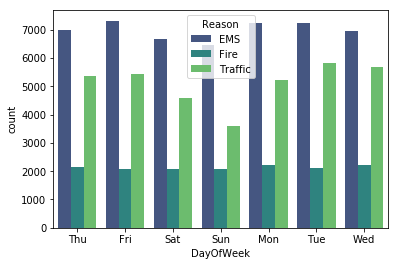

In [168]:
sns.countplot(x='DayOfWeek', hue='Reason', data=df911, palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

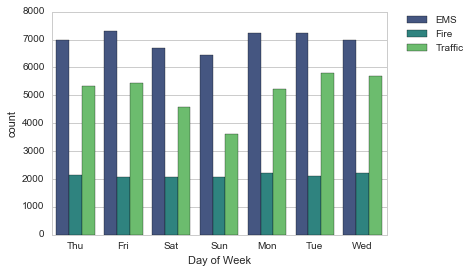

** Agora faça o mesmo para o mês: **

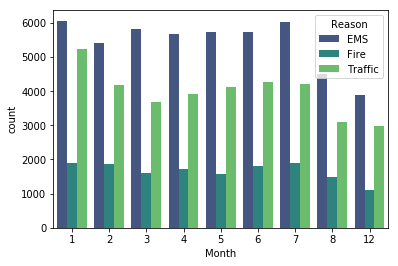

In [169]:
sns.countplot(x='Month', hue='Reason', data=df911, palette='viridis')

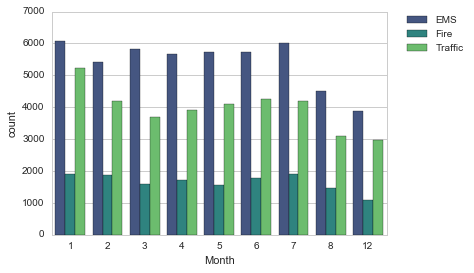

** Você notou algo estranho no Plot? **

_____

** Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...

** Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado. **

In [180]:
ByMonth = df911.groupby('Month').count()

In [181]:
ByMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [178]:
ByMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu
7969,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:12:01,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,Fri
7970,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:17:00,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,Fri
7971,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:22:00,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,0,1,Fri
7972,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:27:01,UPPER MERION,MARK LN & DEAD END,1,EMS,0,1,Fri
7973,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:32:01,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,0,1,Fri


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês. **

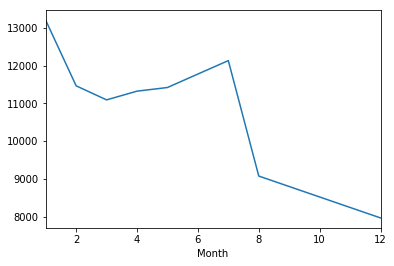

In [188]:
ByMonth['twp'].plot()

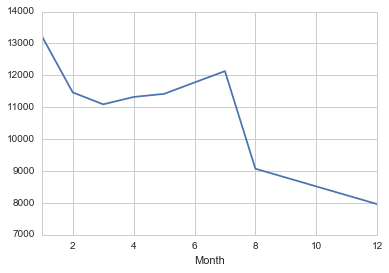

** Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna. **

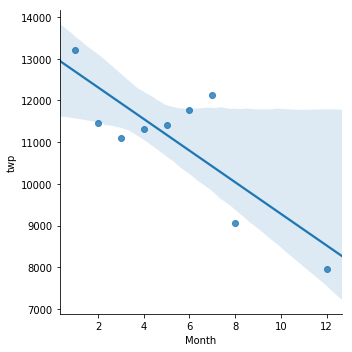

In [208]:

sns.lmplot(x='Month', y='twp', data=ByMonth.reset_index())

** Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date(). **

In [224]:
df911['Date'] = df911['timeStamp'].apply(lambda x:x.date())

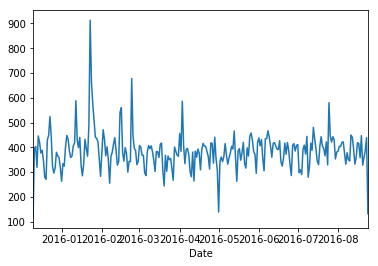

In [243]:
df911.groupby('Date').count()['twp'].plot()

** Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911. **

In [ ]:
df911.groupby('Date').count()['twp'].plot()

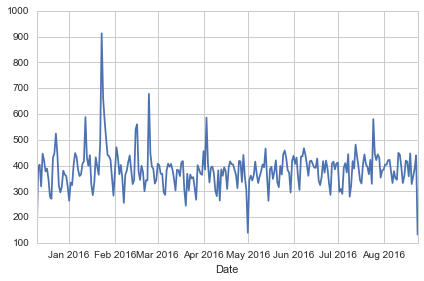

** Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911 **

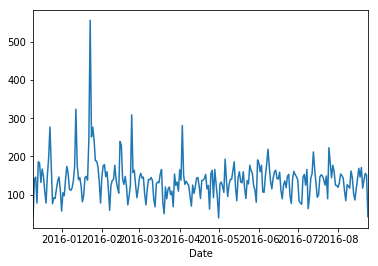

In [246]:
df911[df911['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

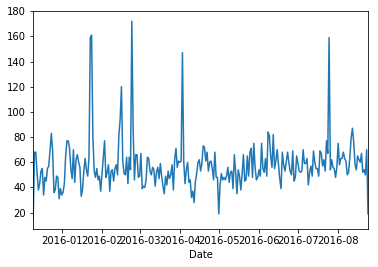

In [248]:
df911[df911['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

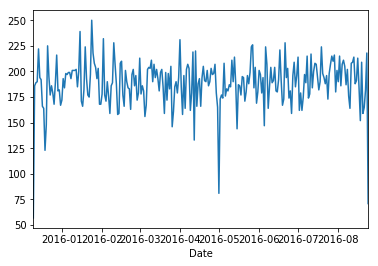

In [247]:
df911[df911['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

____
** Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso! **

In [262]:
df911['DayOfWeek']

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
99462    2
99463    2
99464    2
99465    2
99466    2
99467    2
99468    2
99469    2
99470    2
99471    2
99472    2
99473    2
99474    2
99475    2
99476    2
99477    2
99478    2
99479    2
99480    2
99481    2
99482    2
99483    2
99484    2
99485    2
99486    2
99487    2
99488    2
99489    2
99490    2
99491    2
Name: DayOfWeek, Length: 99492, dtype: int64

In [291]:
dayHour = df911.groupby(by=['DayOfWeek', 'Hour']).count()['twp'].unstack()

** Agora crie um mapa de calor usando este DataFrame **

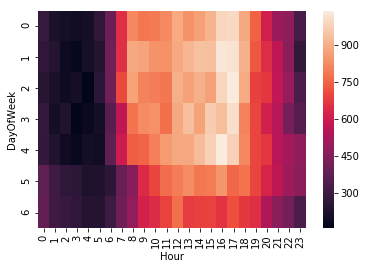

In [287]:

sns.heatmap(dayHour)

** Agora crie um clustermap usando este DataFrame. **

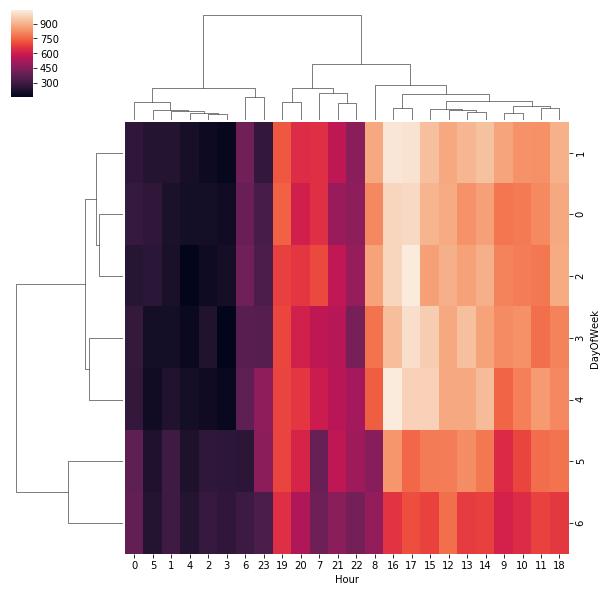

In [286]:
sns.clustermap(dayHour)

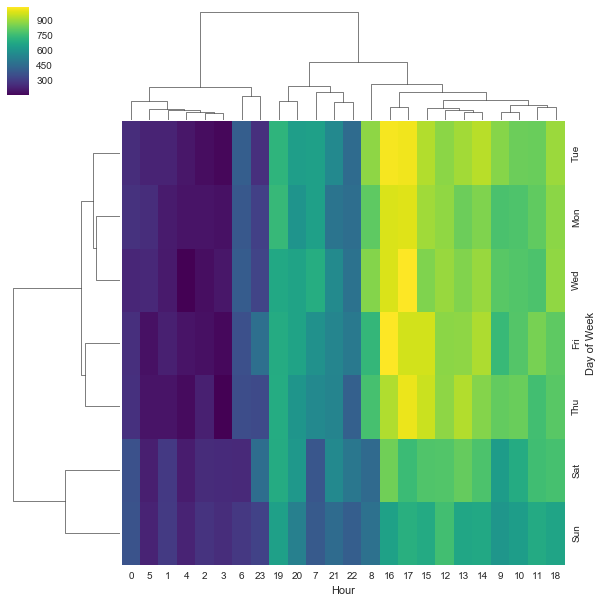

** Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna. **

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


In [290]:
dayMonth = df911.groupby(by=['DayOfWeek', 'Month']).count()['twp'].unstack()

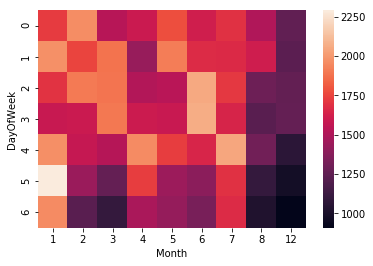

In [292]:
sns.heatmap(dayMonth)

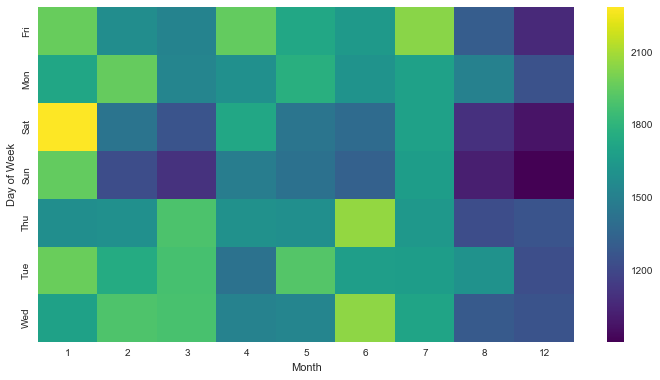

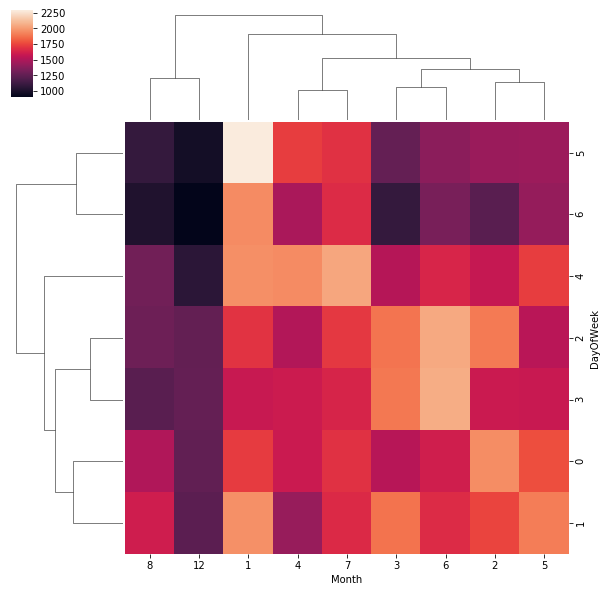

In [293]:
sns.clustermap(dayMonth)